Task - 3

Problem Statement : Decision tree classifier for prediction

Dataset Used : https://www.kaggle.com/datasets/uciml/iris

About DataSet : The Iris dataset contains measurements of iris flowers belonging to three different species: Setosa, Versicolor, and Virginica.The dataset is well-structured and contains a total of 150 samples, with 50 samples for each of the three iris species. 

In [38]:
#import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

In [39]:
#loading dataset
df=pd.read_csv("iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [58]:
#preparing data
x=df.drop('Species',axis=1)
y=df['Species']
x

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [41]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [70]:
#categorical data preprocessing
x_en=pd.get_dummies(x,drop_first=True)

In [60]:
#training set and testing set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [61]:
#initializing decision tree classifire
clf=DecisionTreeClassifier(random_state=42)

In [62]:
#train the classifier
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [63]:
#prediction
y_pred=clf.predict(x_test)

In [64]:
print('Number of features in x_train:',len(x_train.columns))
print('Number of features in x_test:',len(x_test.columns))

Number of features in x_train: 5
Number of features in x_test: 5


In [65]:
print('Feature name:',x_train.columns)

Feature name: Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')


In [72]:
#evaluation of model
accuracy=accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
classification_rep=classification_report(y_test,y_pred)

print(f'Accuracy:{accuracy:.2f}')

Accuracy:1.00


Interpretation : An accuracy score of 1.00, or 100%, indicates that the model correctly predicted all instances in the dataset, meaning there were no misclassifications. In other words, every data point in the dataset was classified correctly according to the model's predictions.

In [73]:
print('Confusion Matrix')
print(conf_matrix)
print(classification_rep)

Confusion Matrix
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Interpretation : All the instances are correctly classified according to the diagonal element.

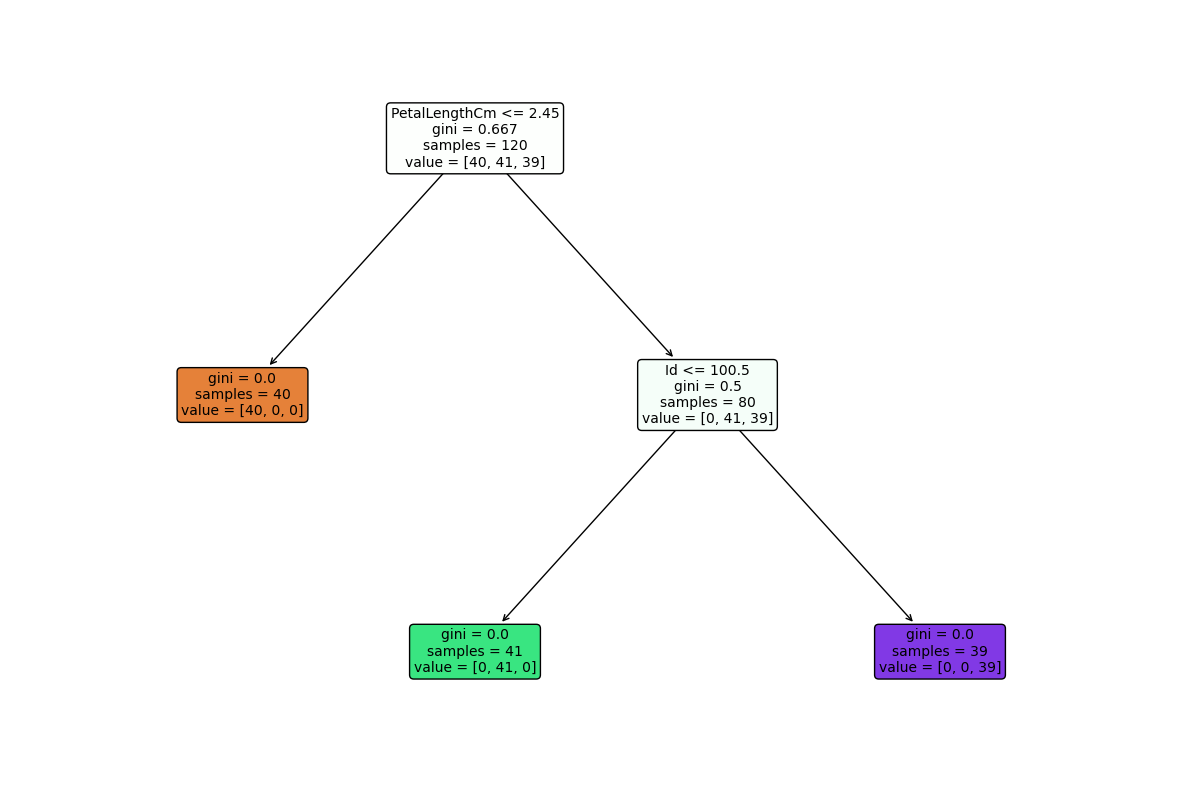

In [69]:
#visualizationof decision tree
plt.figure(figsize=(15,10))
plot_tree(clf,filled=True, feature_names=list(x.columns),rounded=True,fontsize=10)
plt.show()